In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
data = pd.read_csv('tips.csv')

In [6]:
data

,total_bill,tip,gender,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3.560330e+15,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4.478070e+15,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6.011810e+15,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4.676140e+15,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4.832730e+15,Sun2251
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5.296070e+15,Sat2657
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3.506810e+15,Sat1766
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6.011890e+15,Sat3880
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4.375220e+12,Sat17


In [7]:
total_bill_series = data['total_bill']

In [8]:
total_bill_series 

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [9]:
mu, std = total_bill_series .mean(),total_bill_series .std()

In [10]:
mu

19.78594262295082

In [11]:
std

8.902411954856856

In [12]:
z_score = (total_bill_series -mu)/std

In [13]:
z_score

0     -0.314066
1     -1.061054
2      0.137497
3      0.437416
4      0.539635
         ...   
239    1.038377
240    0.830568
241    0.323964
242   -0.220833
243   -0.112997
Name: total_bill, Length: 244, dtype: float64

<Axes: xlabel='total_bill', ylabel='Count'>

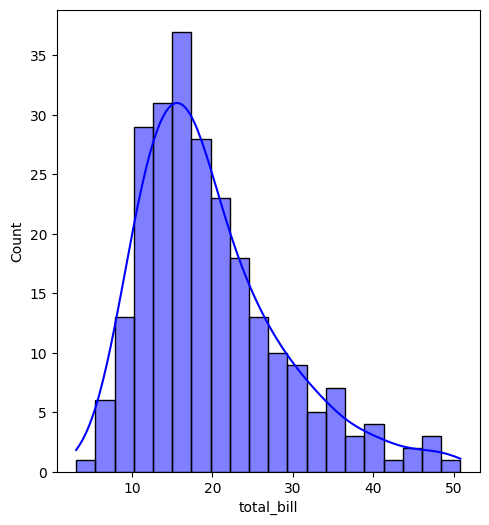

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
#plt.hist(total_bill_series , bins=20, color='b',edgecolor='black')
sns.histplot(total_bill_series , bins=20, color='b',edgecolor='black',kde=True)

In [15]:
#NORMAL DISTRIBUTION
x = np.linspace(total_bill_series.min(),total_bill_series.max(),100)
p =stats.norm.pdf(x,mu,std)

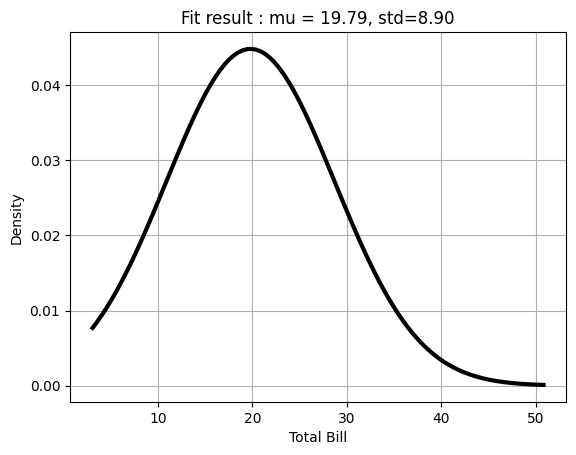

In [13]:
plt.plot(x,p,'k',linewidth=3)
title = "Fit result : mu = %.2f, std=%.2f"% (mu,std)
plt.title(title)
plt.xlabel("Total Bill")
plt.ylabel("Density")
plt.grid(True)

((array([-2.7660794 , -2.46319801, -2.29114787, -2.16825434, -2.07137443,
         -1.99075074, -1.9213089 , -1.86005848, -1.80508277, -1.75507658,
         -1.70910939, -1.66649348, -1.62670558, -1.58933792, -1.55406631,
         -1.52062855, -1.48880944, -1.45843008, -1.42934008, -1.40141172,
         -1.37453559, -1.34861722, -1.32357442, -1.29933525, -1.27583633,
         -1.25302156, -1.230841  , -1.20924999, -1.18820845, -1.16768023,
         -1.14763264, -1.12803597, -1.10886319, -1.09008958, -1.07169252,
         -1.0536512 , -1.03594646, -1.01856064, -1.00147737, -0.98468148,
         -0.96815887, -0.95189643, -0.93588192, -0.9201039 , -0.90455168,
         -0.88921522, -0.87408512, -0.85915251, -0.84440907, -0.82984693,
         -0.81545867, -0.80123728, -0.78717613, -0.77326892, -0.75950968,
         -0.74589275, -0.73241275, -0.71906453, -0.70584322, -0.69274417,
         -0.67976291, -0.66689521, -0.65413699, -0.64148438, -0.62893363,
         -0.61648119, -0.60412361, -0.

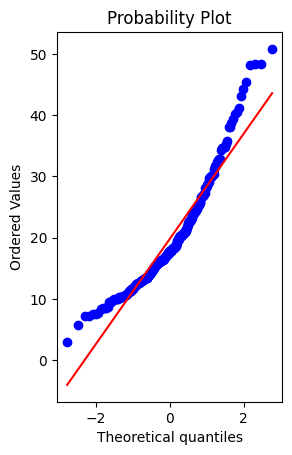

In [14]:
#QQ PLOT
plt.subplot(1,2,2)
stats.probplot(total_bill_series ,dist='norm',plot=plt)

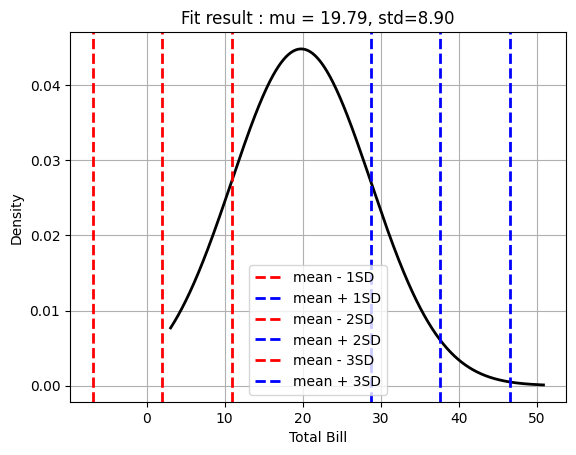

In [21]:
#NORMAL DISTRIBUTION
x = np.linspace(total_bill_series.min(),total_bill_series.max(),1000)
p =stats.norm.pdf(x,mu,std)
plt.plot(x,p,'k',linewidth=2)
title = "Fit result : mu = %.2f, std=%.2f"% (mu,std)
plt.title(title)
plt.xlabel("Total Bill")
plt.ylabel("Density")
plt.grid(True)

#plot mean=- 3SD
for i in range(1,4):
    plt.axvline(mu-i*std,color='r',linestyle='--',linewidth=2,label=f'mean - {i}SD')
    plt.axvline(mu+i*std,color='b',linestyle='--',linewidth=2,label=f'mean + {i}SD')

plt.legend()

In [22]:
within_1sd = (z_score <=1) &(z_score >=-1)
within_2sd = (z_score <=2) &(z_score >=-2)
within_3sd = (z_score <=3) &(z_score >=-3)


In [23]:
within_1sd.sum()/len(total_bill_series)*100

72.1311475409836

In [24]:
percentage_within_1sd = np.sum(within_1sd)/len(total_bill_series)*100
percentage_within_2sd = np.sum(within_2sd)/len(total_bill_series)*100
percentage_within_3sd = np.sum(within_3sd)/len(total_bill_series)*100
                               

In [25]:
percentage_within_1sd 

72.1311475409836

In [26]:
result_df = pd.DataFrame({
    'total_bill' : total_bill_series,
    'z_score' : z_score,
    'within_1sd' : within_1sd,
    'within_2sd' : within_2sd,
    'within_3sd' : within_3sd
})

In [27]:
import os

In [28]:
if os.path.exists('deletethis-2.csv'):
    os.remove('deletethis-2.csv')

In [29]:
result_df.to_csv('deletethis-2.csv',index=False)

In [30]:
#outliers
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x1236326b380>,
 'caps': [<matplotlib.lines.Line2D at 0x1236326b6e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1236326b1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1236326bc50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1236326bf20>],
 'means': []}

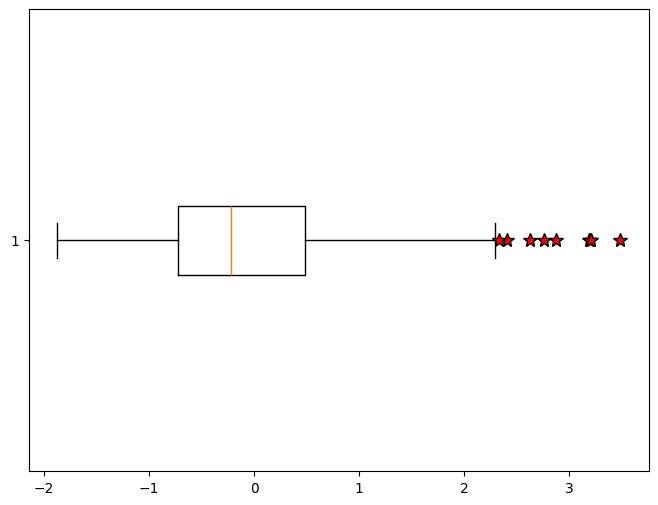

In [45]:
plt.figure(figsize=(8,6))
plt.boxplot(result_df['z_score'],vert=False,flierprops= dict(marker='*',markerfacecolor='red',markersize=10))
